<h2>Using Linear Regression to predict the population in Citys vs. the Profit</h2>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Importing the data set and assigning variables 

In [2]:
data = pd.read_csv('ProfitPerCity.txt', header=None)
X = data.iloc[:,0]
y = data.iloc[:,1]
m = len(y)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Plotting the data 

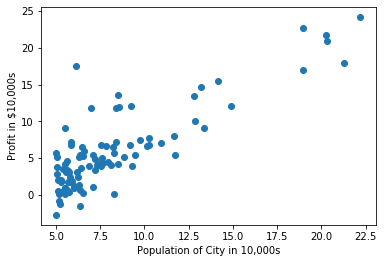

In [3]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:
X = X[:, np.newaxis]
y = y[:, np.newaxis]
theta = np.zeros([2,1]) #creating a 2 x 1 matrix filled with zeros
iterations = 1500
alpha = .01
ones = np.ones((m,1))
X = np.hstack((ones,X))

Creating a function to calculate the hypothesis
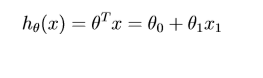

In [5]:
def hyp(X, theta):
    return np.dot(X, theta)

Creating a function to calculate the cost, using the hypothesis function 

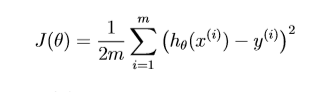

In [6]:
def computeCost(X, y, theta):
    temp = hyp(X, theta) - y
    return np.sum(np.power(temp,2))/(2*m)

J = computeCost(X, y, theta)
print(J)

32.072733877455676


Calculating the gradient descent using the formula 
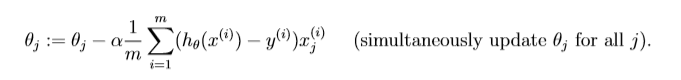

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        temp = hyp(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m)*temp
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [8]:
#using the value of theta returned by the gradient descent function 
#to calculate the new minimized cost 
J = computeCost(X, y, theta)
print(J)

4.483388256587726


Plotting the training data with the linear regression fit 

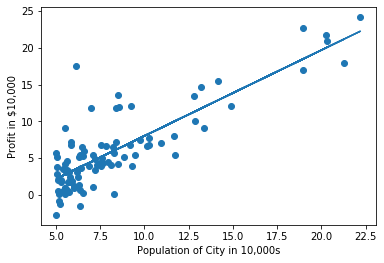

In [13]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], np.dot(X, theta))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

plt.show()